In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt




In [25]:
df=pd.read_excel('C:/Users/User/Documents/INTERNSHIP/eda data/ice melt/2009.xlsx')

In [26]:
df.head(10)

,LAT,LON,TIME,THICK,ELEVATION,FRAME,SURFACE,BOTTOM,QUALITY
0,-73.347771,-107.628508,57774.5012,-9999.0,7323.3039,2009101601001,-9999.0,-9999.0,1
1,-73.347826,-107.628834,57774.5726,-9999.0,7322.9762,2009101601001,-9999.0,-9999.0,1
2,-73.347880,-107.629159,57774.6441,-9999.0,7322.6485,2009101601001,-9999.0,-9999.0,1
3,-73.347935,-107.629484,57774.7155,-9999.0,7322.3209,2009101601001,-9999.0,-9999.0,1
4,-73.347990,-107.629810,57774.7869,-9999.0,7321.9932,2009101601001,-9999.0,-9999.0,1
5,-73.348045,-107.630135,57774.8583,-9999.0,7321.6655,2009101601001,-9999.0,-9999.0,1
6,-73.348099,-107.630461,57774.9298,-9999.0,7321.3379,2009101601001,-9999.0,-9999.0,1
7,-73.348154,-107.630786,57775.0012,-9999.0,7321.0103,2009101601001,-9999.0,-9999.0,1
8,-73.348209,-107.631112,57775.0726,-9999.0,7320.6826,2009101601001,-9999.0,-9999.0,1
9,-73.348264,-107.631437,57775.1440,-9999.0,7320.3550,2009101601001,-9999.0,-9999.0,1


In [27]:
df.shape

(168786, 9)

In [28]:
df1=pd.read_excel('C:/Users/User/Documents/INTERNSHIP/eda data/ice melt/2019.xlsx')

In [50]:
df1.head(10)

,LAT,LON,UTCTIMESOD,THICK,ELEVATION,FRAME,SURFACE,BOTTOM,QUALITY,TIME_COLUMN
0,-68.954343,154.349069,4759.7240,-9999.00,2337.3243,2019112004001,1632.21,-9999.00,1,1970-01-01 00:00:00.000004759
1,-68.954466,154.349214,4759.8310,-9999.00,2336.3406,2019112004001,1632.21,-9999.00,1,1970-01-01 00:00:00.000004759
2,-68.954590,154.349359,4759.9380,957.27,2335.3571,2019112004001,1632.20,2589.47,1,1970-01-01 00:00:00.000004759
3,-68.954713,154.349504,4760.0451,966.94,2334.3732,2019112004001,1631.33,2598.28,1,1970-01-01 00:00:00.000004760
4,-68.954837,154.349649,4760.1521,964.02,2333.3894,2019112004001,1628.31,2592.33,1,1970-01-01 00:00:00.000004760
5,-68.954961,154.349794,4760.2592,956.51,2332.4055,2019112004001,1625.27,2581.78,1,1970-01-01 00:00:00.000004760
6,-68.955084,154.349939,4760.3662,957.16,2331.4216,2019112004001,1623.92,2581.08,1,1970-01-01 00:00:00.000004760
7,-68.955208,154.350084,4760.4732,957.27,2330.4374,2019112004001,1623.87,2581.14,1,1970-01-01 00:00:00.000004760
8,-68.955331,154.350229,4760.5803,961.71,2329.4531,2019112004001,1623.82,2585.54,1,1970-01-01 00:00:00.000004760
9,-68.955455,154.350374,4760.6873,958.83,2328.4685,2019112004001,1621.33,2580.15,1,1970-01-01 00:00:00.000004760


In [30]:
df.shape

(168786, 9)

In [37]:
print(df.columns)
print(df1.columns)

Index(['LAT', 'LON', 'TIME', 'THICK', 'ELEVATION', 'FRAME', 'SURFACE',
       'BOTTOM', 'QUALITY', 'TIME_COLUMN'],
      dtype='object')
Index(['LAT', 'LON', 'UTCTIMESOD', 'THICK', 'ELEVATION', 'FRAME', 'SURFACE',
       'BOTTOM', 'QUALITY', 'TIME_COLUMN'],
      dtype='object')


In [43]:
df['TIME_COLUMN'] = pd.to_datetime(df['TIME'])
df1['TIME_COLUMN'] = pd.to_datetime(df1['UTCTIMESOD'])

In [44]:
df.head()

,LAT,LON,TIME,THICK,ELEVATION,FRAME,SURFACE,BOTTOM,QUALITY,TIME_COLUMN
0,-73.347771,-107.628508,57774.5012,-9999.0,7323.3039,2009101601001,-9999.0,-9999.0,1,1970-01-01 00:00:00.000057774
1,-73.347826,-107.628834,57774.5726,-9999.0,7322.9762,2009101601001,-9999.0,-9999.0,1,1970-01-01 00:00:00.000057774
2,-73.347880,-107.629159,57774.6441,-9999.0,7322.6485,2009101601001,-9999.0,-9999.0,1,1970-01-01 00:00:00.000057774
3,-73.347935,-107.629484,57774.7155,-9999.0,7322.3209,2009101601001,-9999.0,-9999.0,1,1970-01-01 00:00:00.000057774
4,-73.347990,-107.629810,57774.7869,-9999.0,7321.9932,2009101601001,-9999.0,-9999.0,1,1970-01-01 00:00:00.000057774


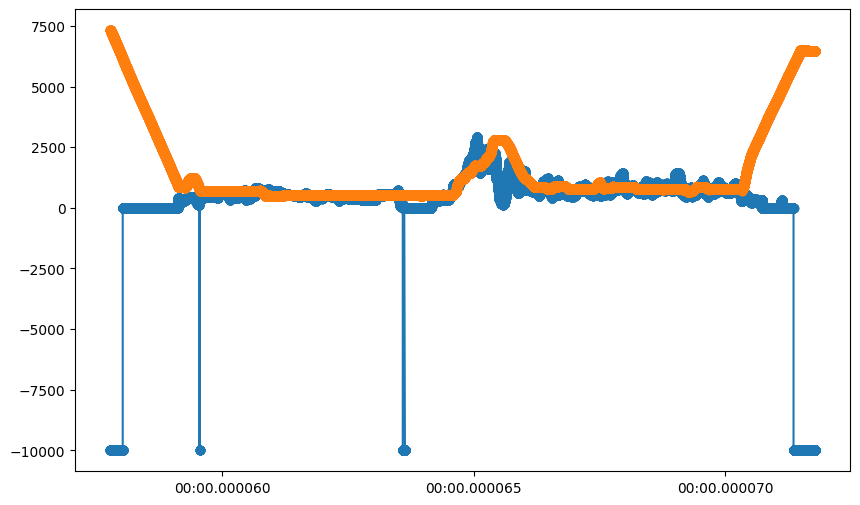

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(df['TIME_COLUMN'], df['THICK'], label='Ice Thickness (2009)', marker='o')
plt.plot(df['TIME_COLUMN'], df['ELEVATION'], label='Surface Elevation (2009)', marker='o')

In [39]:
df_2009 = df[df['TIME_COLUMN'].dt.year == 2009]

In [45]:
df_2009.head()

,LAT,LON,TIME,THICK,ELEVATION,FRAME,SURFACE,BOTTOM,QUALITY,TIME_COLUMN


In [40]:
df1_2019 = df1[df1['TIME_COLUMN'].dt.year == 2019]


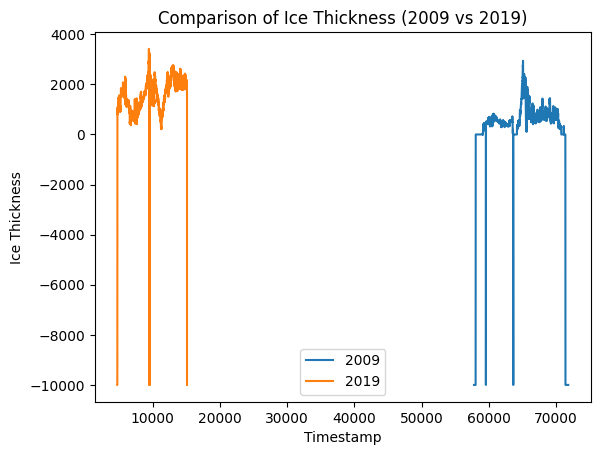

In [46]:
plt.plot(df['TIME'], df['THICK'], label='2009')
plt.plot(df1['UTCTIMESOD'], df1['THICK'], label='2019')
plt.legend()
plt.title('Comparison of Ice Thickness (2009 vs 2019)')
plt.xlabel('Timestamp')
plt.ylabel('Ice Thickness')
plt.show()

In [42]:
print(df_2009)
print(df1_2019)

Empty DataFrame
Columns: [LAT, LON, TIME, THICK, ELEVATION, FRAME, SURFACE, BOTTOM, QUALITY, TIME_COLUMN]
Index: []
Empty DataFrame
Columns: [LAT, LON, UTCTIMESOD, THICK, ELEVATION, FRAME, SURFACE, BOTTOM, QUALITY, TIME_COLUMN]
Index: []
